## 지수평활법.EMA

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.DataFrame({
    "week":pd.date_range(start="2020-08",periods=8,freq="W"),
    "sales":[39,44,40,45,38,43,39,np.nan],
    "3EMA":[0]*8
})
df

,week,sales,3EMA
0,2020-08-02,39.0,0
1,2020-08-09,44.0,0
2,2020-08-16,40.0,0
3,2020-08-23,45.0,0
4,2020-08-30,38.0,0
5,2020-09-06,43.0,0
6,2020-09-13,39.0,0
7,2020-09-20,NaN,0


In [4]:
def myEWMA(data,span):
    # 지수 이동평균을 계산해서 저장할 리스트
    ewma=[0]*len(data)
    # 지수 이동편균의 분자
    molecule=0
    # 지수이동평균의 분모
    denomianator=0
    # 값에 곱해지는 가중치
    alpha=2.0/(1.0+span)
    
    for i in range(len(data)):
        # 분자계산 (data+(1-alpha)*molecule)
        # 분모계산 (1-alpha)의 i승
        molecule=(data[i]+(1.0-alpha)*molecule)
        denomianator += (1-alpha)**i
        print("index:",i)
        print("molecule:",molecule)
        print("denominator:",denomianator)
        # 지수 이동 평균 계산
        ewma[i]=molecule/denomianator
        print("ewma",ewma[i])
        print("="*100)
    return ewma
        


In [5]:
df['sales'].iloc[0:2].ewm(span=3).mean()

0    39.000000
1    42.333333
Name: sales, dtype: float64

In [6]:
myEWMA(df['sales'].iloc[0:2],3)


index: 0
molecule: 39.0
denominator: 1.0
ewma 39.0
index: 1
molecule: 63.5
denominator: 1.5
ewma 42.333333333333336


[39.0, 42.333333333333336]

,index,val
0,0,1.0
1,1,4.0
2,2,2.0
3,3,3.0
4,4,2.0
5,5,5.0
6,6,13.0
7,7,10.0
8,8,12.0
9,9,14.0


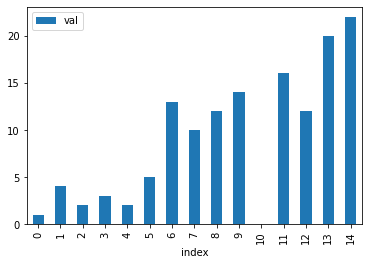

In [7]:
import pandas as pd
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
# df['val'].plot.bar(rot=0, subplots=True)
df.plot(kind='bar',x='index',y='val')
df

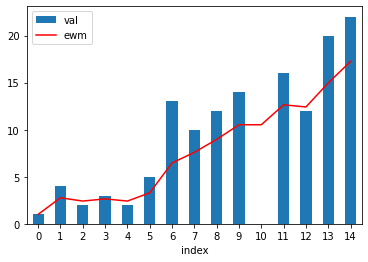

In [8]:
import matplotlib.pyplot as plt
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) # val열에 ewm 메서드적용 후 df
#에 추가 #알파는 가중치
ax = df.plot(kind='bar',x='index',y='val') # ax에 df의 bar chart 생성
ax2= df2.plot(kind='line',x='index', y='ewm', color='red', ax=ax) # ax2에 df2의 line chart 생
#후 ax에 추가
plt.show() # 그래프 출력

In [9]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
from datetime import datetime
%matplotlib inline

In [12]:
# 2020년 8월부터 일요일 8개를 조회
#start:시작일, periods: 생성할 날짜의 개수, freq: 생성할 날짜의 주기
pd.date_range(start="2020-08",periods=8,freq="W")

DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [13]:
df= pd.DataFrame({
    "week":pd.date_range(start="2020-08",periods=8,freq="W"),
    "sales":[39,44,40,45,38,43,39,np.nan],
    "3MA":[0]*8
})

In [16]:
# 0~2주차 평균을 3주차에 shift해서 적용
df["3MA"]=df[["sales"]].ewm(3).mean().shift(1)
df["3MA"]

0          NaN
1    39.000000
2    41.857143
3    41.054054
4    42.497143
5    41.023047
6    41.624295
7    40.867155
Name: 3MA, dtype: float64

In [17]:
# 0~2주차 평균을 3주차에 shift해서 적용
df["3MA"]=df[["sales"]].ewm(3).sum().shift(1)
df["3MA"]

0           NaN
1     39.000000
2     73.250000
3     94.937500
4    116.203125
5    125.152344
6    136.864258
7    141.648193
Name: 3MA, dtype: float64

In [ ]:
# Time series plot
import matplotlib.pyplot as plt

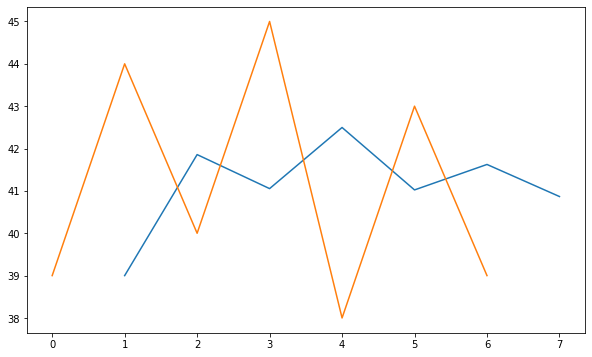

In [ ]:
plt.figure(figsize=[10,6])
df["3MA"].plot()
df.sales.plot()

plt.show()

In [ ]:
import FinanceDataReader as fdr
# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기

In [ ]:
df_apple=fdr.DataReader('AAPL',start='2010')
# df= pd.DataFrame({
#     "week":pd.date_range(start="2020-08",periods=8,freq="W"),
#     "sales":[39,44,40,45,38,43,39,np.nan],
#     "3MA":[0]*8
# })
df_apple_monthly=df_apple({date})

Text(0.5, 1.0, 'Close Price for Apple')

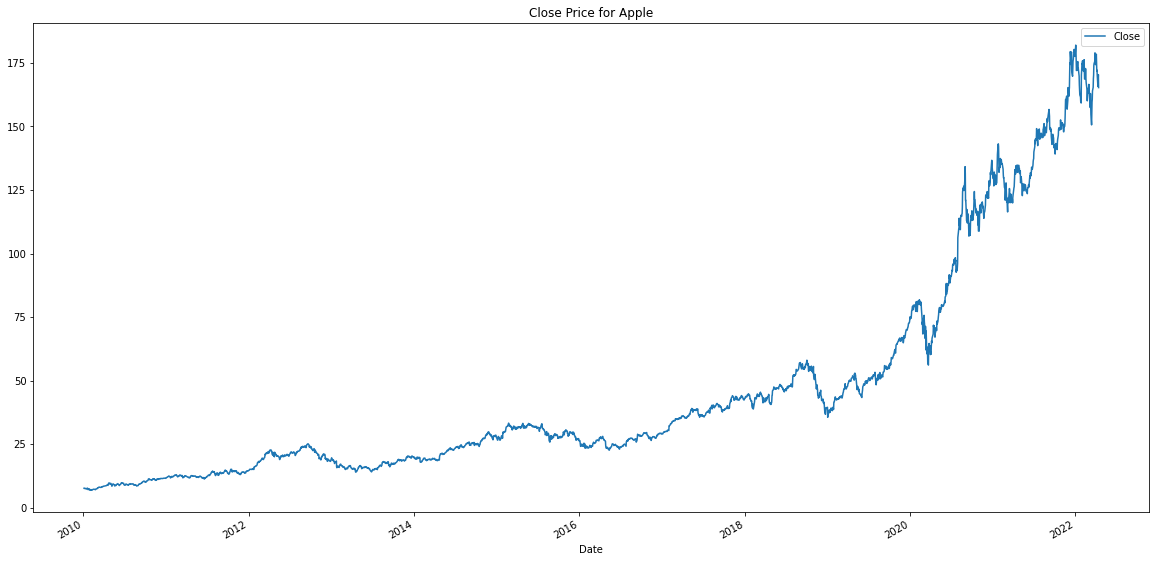

In [ ]:
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean']=df_apple['Close'].ewm(7).mean()
plt.title('Close Price for Apple')

<AxesSubplot:xlabel='Date'>

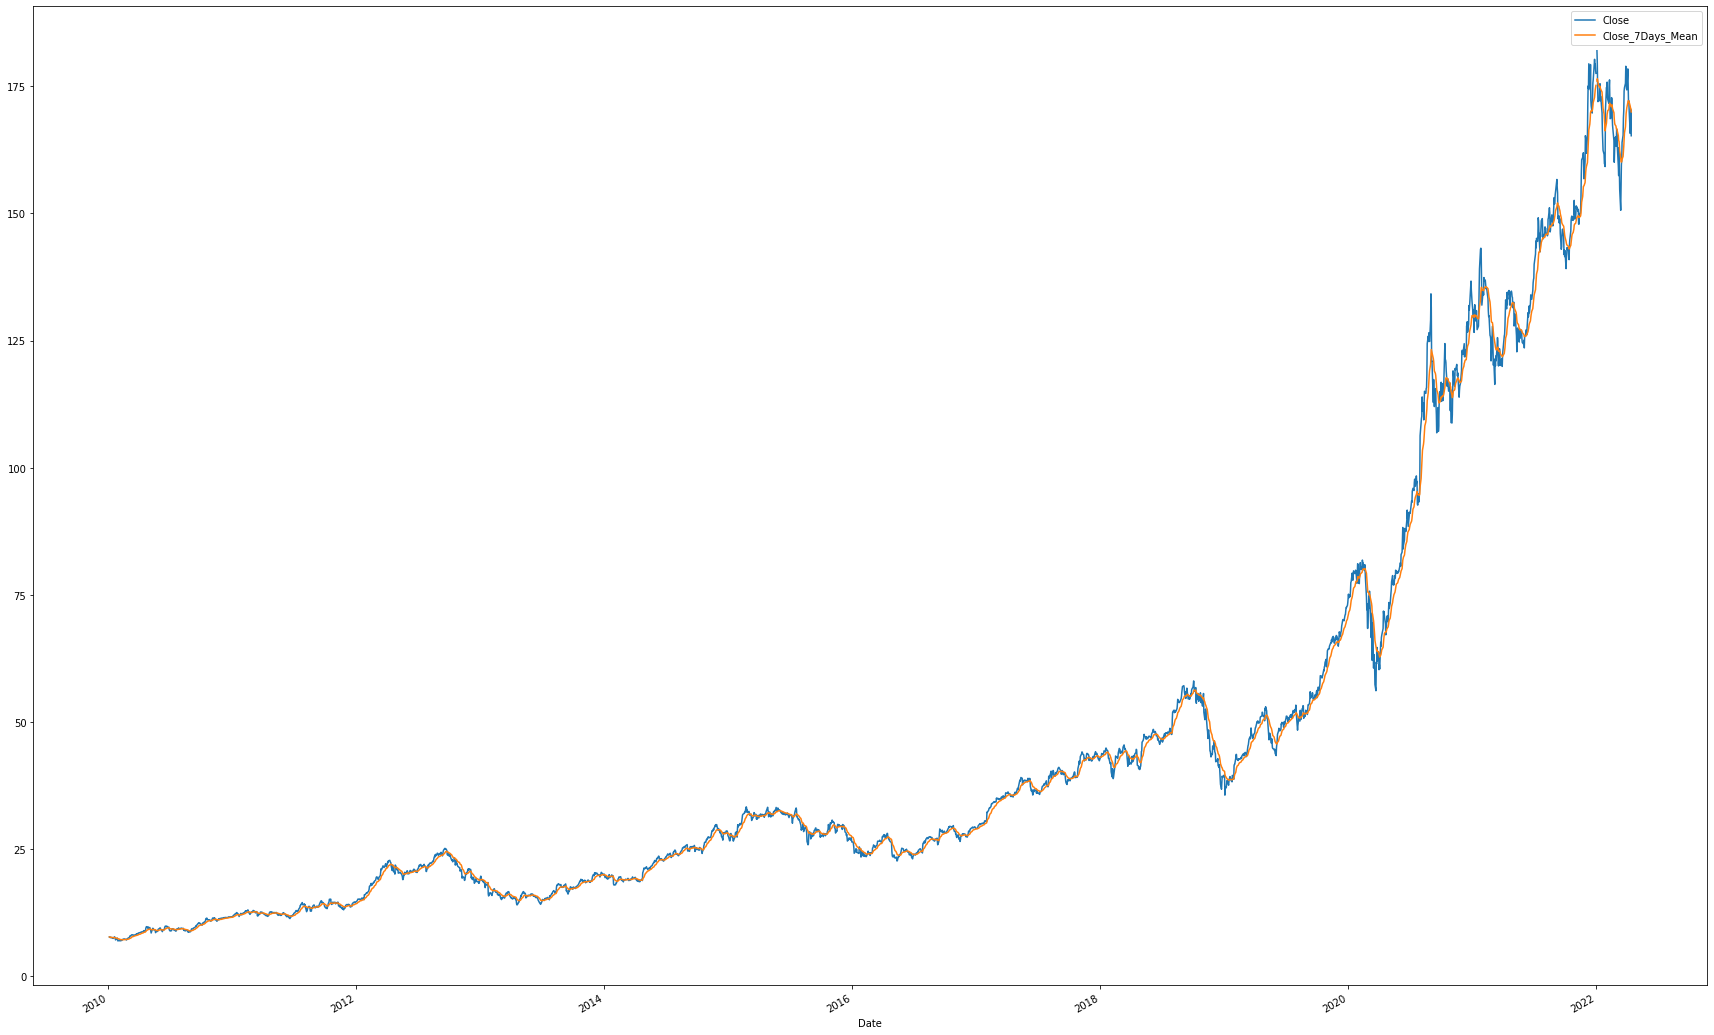

In [ ]:
last_day= datetime(2022,1,2)
df_apple.loc[last_day,"Close"]=np.nan
df_apple['Close_7days_Mean']=df_apple['Close'].ewm(7).mean().shift(1)
df_apple[['Close','Close_7Days_Mean']].plot(figsize=(30,20))
#7일전 평균 값 그래프+ 종가그래프

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

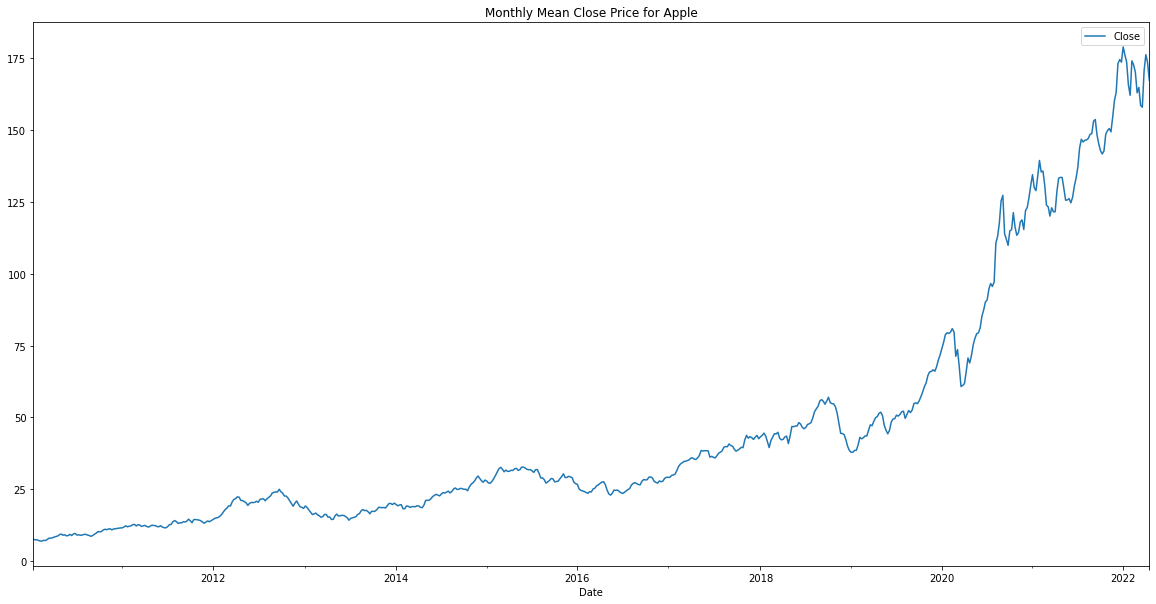

In [ ]:
# pandas dataframe에는 resample 이라는 데이터프레임의 시계열 인덱스 기준으로
# 샘플리을 편하게 해주는 메소드가 있다. 아래와 같이 하면 월단위로 시계열 데이터를 다시 만들어준다.


# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly =df_apple.resample(rule='W').mean()
#resample은 데이터를 원하는 주기로 나눠주는 함수
# 마지막 컬럼(Close_7Days_Mean)제외
df_apple_monthly=df_apple_monthly.iloc[:,:-1]
# 월별 주가(종가)를 시각화
df_apple_monthly[['Close']].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Apple')

<AxesSubplot:xlabel='Date'>

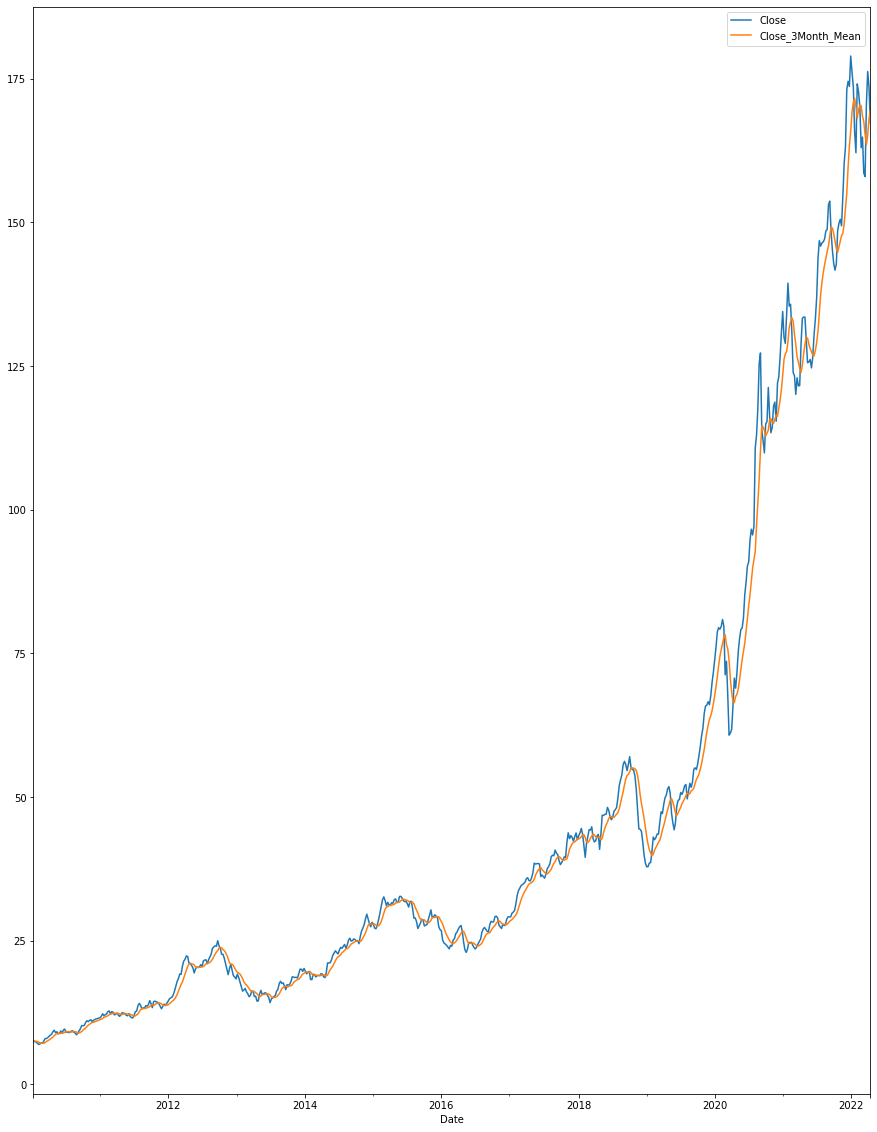

In [ ]:
df_apple_monthly[['Close_3Month_Mean']]=df_apple_monthly[['Close']].ewm(3).mean().shift(1)
# df_apple_monthly[['Close_3Month_Sum']]=df_apple_monthly[['Close']].ewm(3).sum().shift(1)
# shift 해주는 이유 - 3일 평균이면 3일째에 기록이 되어야되니까
df_apple_monthly[['Close','Close_3Month_Mean']].plot(figsize=(15,20))
# df_apple_monthly[['Close','Close_3Month_Sum']].plot(figsize=(15,20))

# df_apple_monthly[['Close_3Month_Mean']]=df_apple_monthly[['Close']].expanding(3).mean().shift(1)
# df_apple_monthly[['Close_3Month_Sum']]=df_apple_monthly[['Close']].expanding(3).sum().shift(1)
# # shift 해주는 이유 - 3일 평균이면 3일째에 기록이 되어야되니까
# df_apple_monthly[['Close','Close_3Month_Mean']].plot(figsize=(15,20))
# df_apple_monthly[['Close','Close_3Month_Sum']].plot(figsize=(15,20))

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [5]:
datasets=load_breast_cancer()

In [6]:
X_features=datasets.data
y_label=datasets.target

In [7]:
cancer_df=pd.DataFrame(data=X_features,columns=datasets.feature_names)


In [9]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [12]:
cancer_df['target']=y_label
cancer_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32